In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data= pd.read_csv('/content/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_len     147 non-null    float64 
 1   sepal_wid     147 non-null    float64 
 2   petal_length  147 non-null    float64 
 3   petal_width   147 non-null    float64 
 4   species       147 non-null    category
dtypes: category(1), float64(4)
memory usage: 6.0 KB


In [32]:
# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Remove duplicates
data.drop_duplicates(inplace=True)

# Rename columns if needed
data.rename(columns={"sepal_length": "sepal_len", "sepal_width": "sepal_wid"}, inplace=True)

# Check data types and convert if necessary
data['species'] = data['species'].astype('category')
data

,sepal_len,sepal_wid,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<ipython-input-74-ee13d01e765f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="species", y="petal_length", data=data, ci=None)


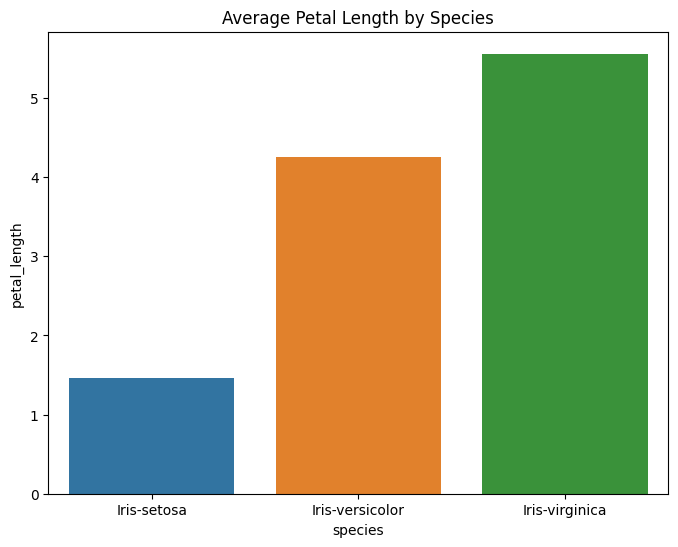

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x="species", y="petal_length", data=data, ci=None)
plt.title("Average Petal Length by Species")
plt.show()


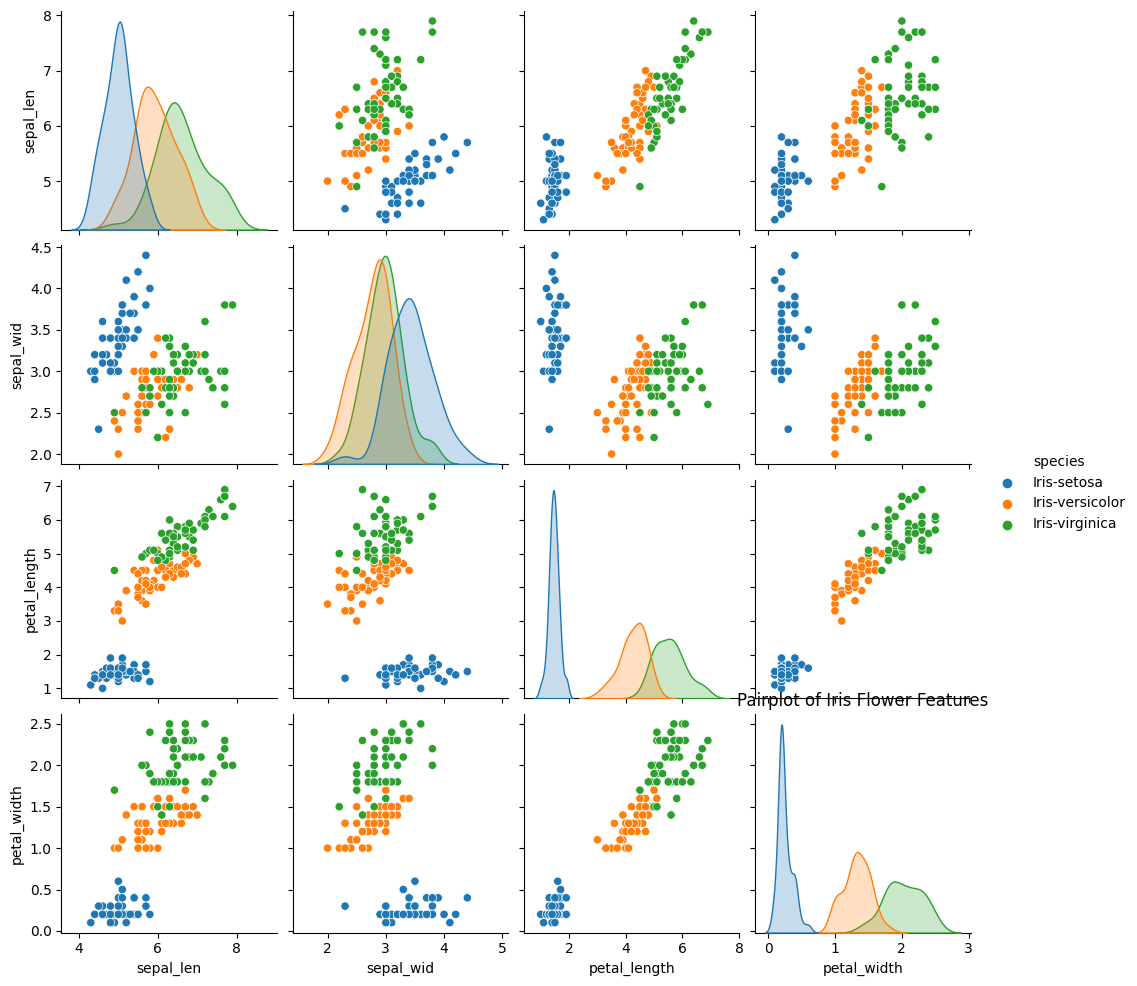

In [33]:
# Pairplot: Scatter plots for pairs of numeric variables
sns.pairplot(data, hue="species")
plt.title("Pairplot of Iris Flower Features")
plt.show()

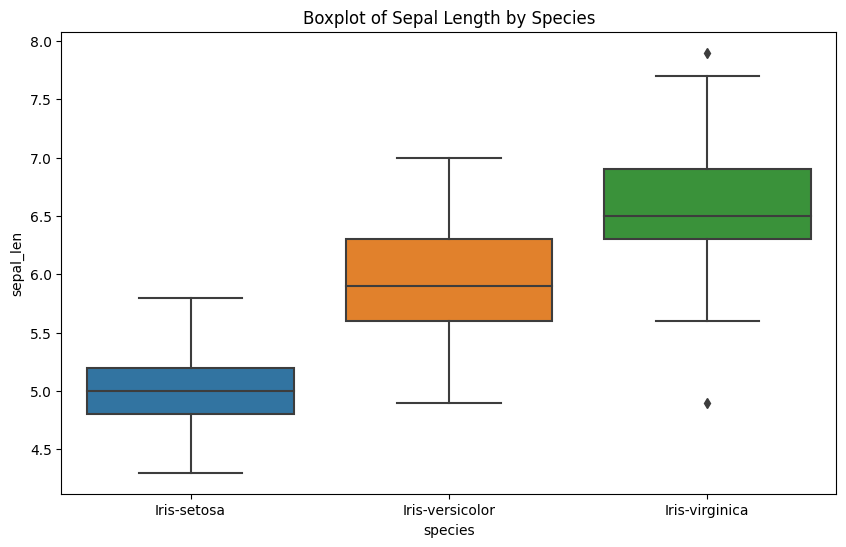

In [34]:
# Box plot: Visualize the distribution of each feature by species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_len", data=data)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

<ipython-input-35-a82c7c8e3dc1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


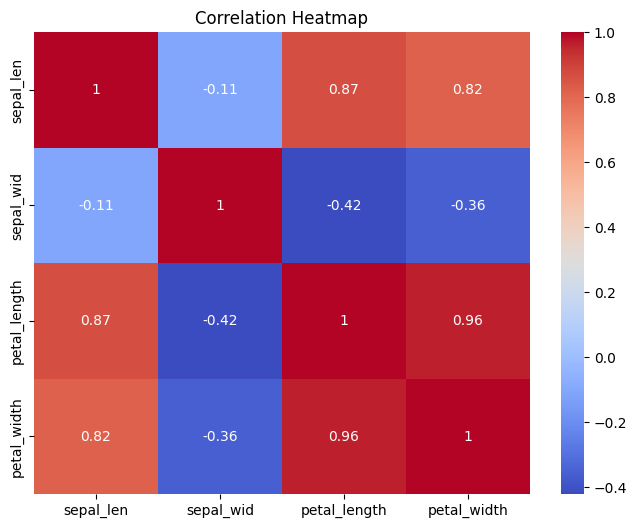

In [35]:
# Correlation heatmap: Explore correlations between numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

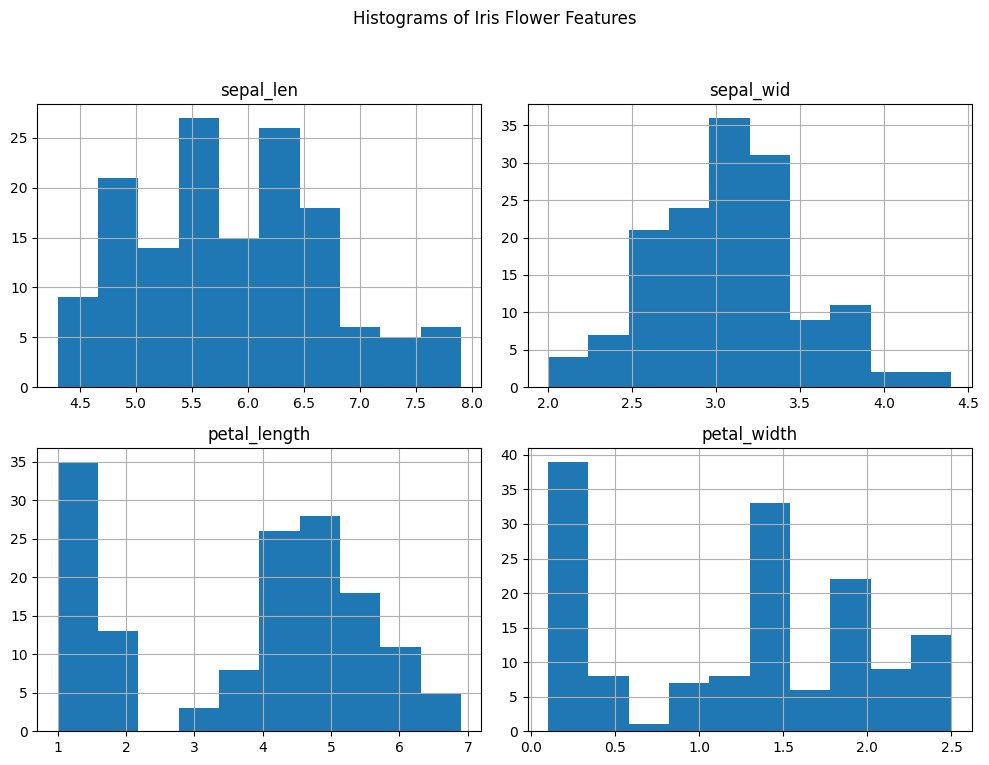

In [36]:
# Histograms: Distribution of each feature
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Iris Flower Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

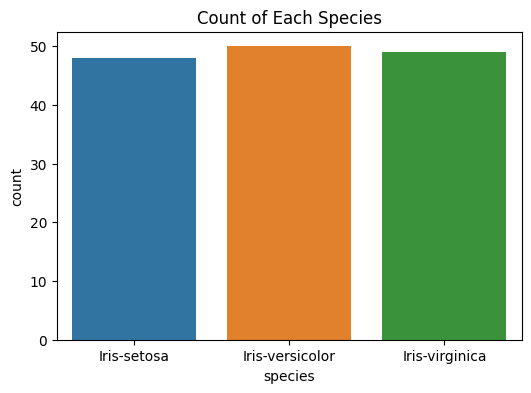

In [37]:
# Count plot: Count of each species
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=data)
plt.title("Count of Each Species")
plt.show()

Text(0, 0.5, 'Length/Width')

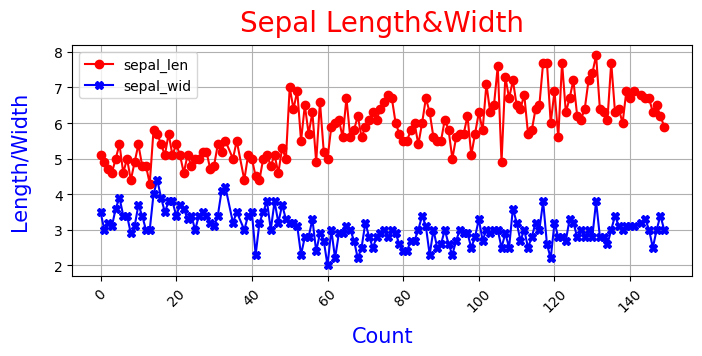

In [38]:
# df['sepal_length'].plot(kind='hist')
data['sepal_len'].plot(kind='line',legend=True,marker='o',color='r',figsize=(8,3),grid=True,rot=45)
data['sepal_wid'].plot(kind='line',legend=True,marker="X",color='b',figsize=(8,3),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

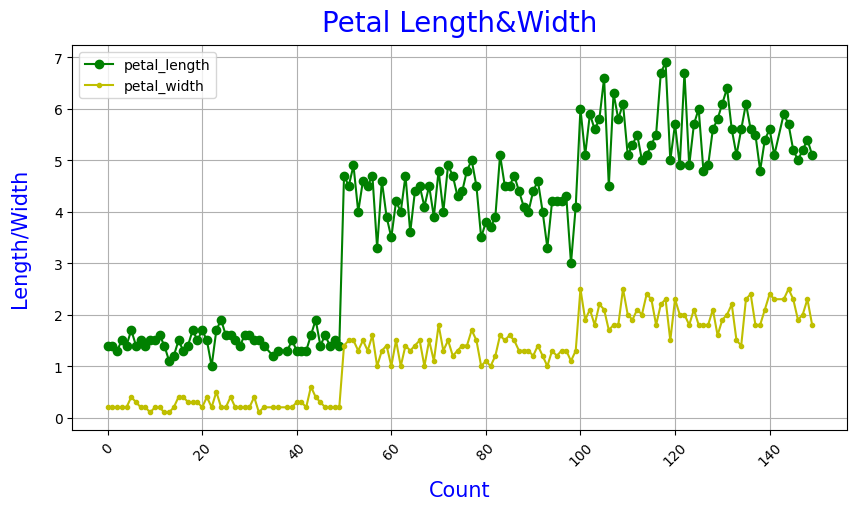

In [39]:
data['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
data['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'b','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Petal length is greater then Petal width

Text(0, 0.5, 'Length/Width')

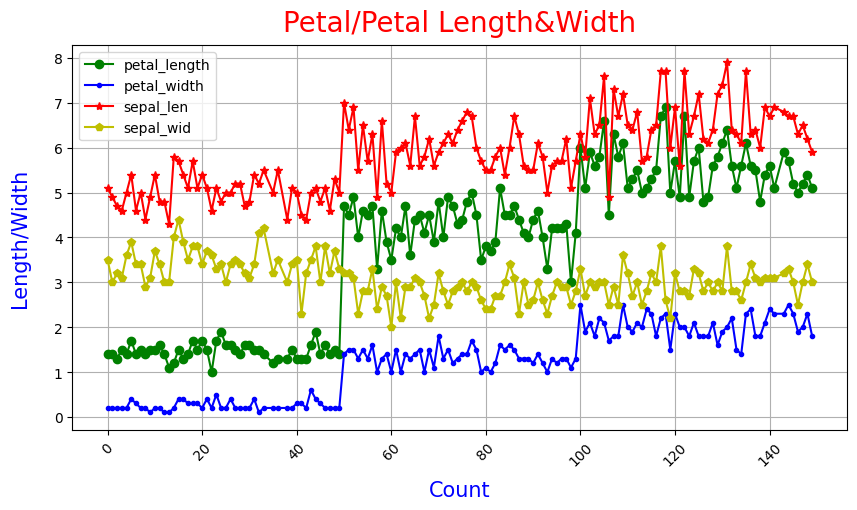

In [40]:
data['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
data['petal_width'].plot(kind='line',legend=True,marker=".",color='b',figsize=(10,5),grid=True,rot=45)
data['sepal_len'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
data['sepal_wid'].plot(kind='line',legend=True,marker="p",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<Axes: title={'center': 'Species'}>

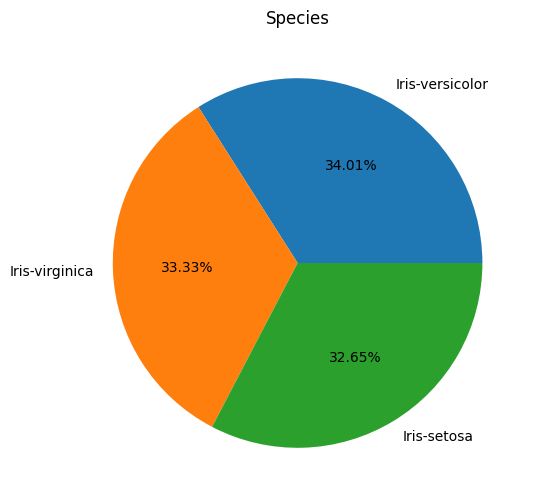

In [41]:
plt.figure(figsize=(10,6))
data['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')


In [43]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:4],data['species'],test_size=0.2,random_state=2)

In [46]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
test = lor.predict(X_test)
for tests in test:
    print("->",tests)

-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-setosa
-> Iris-versicolor
-> Iris-versicolor
-> Iris-virginica
-> Iris-versicolor
-> Iris-versicolor
-> Iris-setosa
-> Iris-versicolor
-> Iris-setosa
-> Iris-versicolor
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-versicolor


In [47]:
lor.score(X_test,y_test)

1.0

In [48]:
minmax = MinMaxScaler()

In [49]:
x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [50]:
lor.fit(x_train,y_train)

LogisticRegression()

In [51]:
test1= lor.predict(x_test)
for test2 in test1:
    print("->",test2)

-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-setosa
-> Iris-versicolor
-> Iris-versicolor
-> Iris-virginica
-> Iris-virginica
-> Iris-versicolor
-> Iris-setosa
-> Iris-versicolor
-> Iris-setosa
-> Iris-versicolor
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica
-> Iris-versicolor
-> Iris-virginica
-> Iris-setosa
-> Iris-setosa
-> Iris-virginica


In [52]:
lor.score(x_test,y_test)

0.9333333333333333

In [55]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
model_dict = {RandomForestClassifier():
              {'n_estimators':[100,150],
                  'criterion': ['gini','entropy','log_loss'],
                 'max_features':['sqrt', 'log2', None]
              },
              SVC():{
                  'gamma':['scale', 'auto']
              },
              LogisticRegression():{ 'penalty':['l1', 'l2','elasticnet'],
                                  'solver':['lbfgs', 'liblinear','newton-cg','newton-cholesky','sag']
                              },
              KNeighborsClassifier():{'n_neighbors':[5,7,9],
                                      'weights':['uniform', 'distance'],
                                      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                                  }
               }

In [57]:
for model in model_dict.keys():
    clf = GridSearchCV(estimator=model,param_grid=model_dict[model],cv=5)
    clf.fit(x_train,y_train)
    print(f"{model} best parameters{clf.best_params_},best score {clf.best_score_}")

RandomForestClassifier() best parameters{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100},best score 0.9402173913043477
SVC() best parameters{'gamma': 'auto'},best score 0.9572463768115942


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression() best parameters{'penalty': 'l2', 'solver': 'lbfgs'},best score 0.9057971014492754
KNeighborsClassifier() best parameters{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'},best score 0.9402173913043479


LogisticRegression() best parameters{'penalty': 'l2', 'solver': 'lbfgs'},best score 0.9057971014492754
KNeighborsClassifier() best parameters{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'},best score 0.9402173913043479

In [62]:
clf_1 = SVC(gamma='auto')
clf_2 = LogisticRegression(penalty= 'l2', solver= 'sag')
clf_3 = KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights= 'uniform')

In [63]:
voting_model = VotingClassifier(estimators=[('svc', clf_1), ('Lr', clf_2), ('knn', clf_3)], voting='hard')

In [70]:
voting_model = voting_model.fit(x_train, y_train)
voting_model.score(x_test,y_test)

1.0

In [68]:
pred = voting_model.predict(x_test)
pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [71]:
final_result = pd.DataFrame({'Predicted_result':pred,'True_value':y_test})

In [72]:
final_result

,Predicted_result,True_value
93,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
36,Iris-setosa,Iris-setosa
136,Iris-virginica,Iris-virginica
84,Iris-versicolor,Iris-versicolor
131,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
44,Iris-setosa,Iris-setosa
128,Iris-virginica,Iris-virginica
